In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


tensor([6, 2, 0, 0])


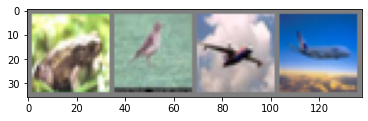

 frog  bird plane plane


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
#         print('Checking')
#         print(inputs.shape, labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Checking
torch.Size([4, 3, 32, 32]) tensor([4, 0, 5, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 6, 9, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 1, 4, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 5, 6, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 4, 9, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 6, 9, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 2, 2, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 5, 5, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 5, 1, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 9, 9, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 7, 6, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 0, 7, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 3, 3, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 1, 5, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 3, 2, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 6, 1, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 9, 7, 3])
Checking
torch.Size([4, 3, 32, 

Checking
torch.Size([4, 3, 32, 32]) tensor([6, 3, 3, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 9, 1, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 1, 8, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 2, 8, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 8, 7, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 0, 3, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 3, 9, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 9, 0, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 9, 8, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 9, 8, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 8, 7, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 1, 6, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 9, 8, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 8, 5, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 0, 7, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 0, 2, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 4, 6, 5])
Checking
torch.Size([4, 3, 32, 

torch.Size([4, 3, 32, 32]) tensor([4, 2, 2, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 2, 8, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 1, 0, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 1, 0, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 0, 9, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 0, 5, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 8, 2, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 3, 5, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 5, 0, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 5, 5, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 1, 0, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 3, 3, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 4, 0, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 6, 4, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 4, 1, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 8, 8, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 8, 4, 8])
Checking
torch.Size([4, 3, 32, 32]) tens

Checking
torch.Size([4, 3, 32, 32]) tensor([1, 6, 1, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 1, 7, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 6, 7, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 6, 9, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 2, 1, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 3, 3, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 8, 8, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 6, 1, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 3, 5, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 1, 2, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 7, 0, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 6, 9, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 1, 3, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 7, 2, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 4, 7, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 7, 7, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 4, 6, 9])
Checking
torch.Size([4, 3, 32, 

Checking
torch.Size([4, 3, 32, 32]) tensor([5, 3, 8, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 1, 3, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 6, 0, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 7, 2, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 5, 0, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 7, 7, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 1, 7, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 7, 2, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 9, 3, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 5, 2, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 9, 4, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 3, 8, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 1, 5, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 8, 6, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 4, 9, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 6, 5, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 6, 2, 4])
Checking
torch.Size([4, 3, 32, 

Checking
torch.Size([4, 3, 32, 32]) tensor([3, 4, 6, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 7, 1, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 1, 0, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 9, 0, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 8, 4, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 3, 9, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 2, 6, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 1, 4, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 2, 0, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 1, 8, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 3, 7, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 0, 7, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 0, 6, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 7, 7, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 7, 0, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 1, 6, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 8, 4, 3])
Checking
torch.Size([4, 3, 32, 

torch.Size([4, 3, 32, 32]) tensor([9, 2, 3, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 2, 2, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 8, 8, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 8, 1, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 4, 8, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 7, 4, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 7, 8, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 5, 9, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 5, 5, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 0, 6, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 7, 9, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 5, 0, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 2, 8, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 9, 5, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 6, 5, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 9, 1, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 7, 1, 2])
Checking
torch.Size([4, 3, 32, 32]) tens

Checking
torch.Size([4, 3, 32, 32]) tensor([6, 8, 4, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 9, 9, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 2, 5, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 9, 0, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 2, 7, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 2, 9, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 6, 2, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 6, 6, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 4, 3, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 9, 1, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 2, 3, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 2, 0, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 2, 0, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 6, 7, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 3, 1, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 8, 2, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 7, 0, 8])
Checking
torch.Size([4, 3, 32, 

Checking
torch.Size([4, 3, 32, 32]) tensor([0, 1, 5, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 3, 8, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 0, 8, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 1, 9, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 8, 2, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 1, 3, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 6, 9, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 0, 0, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 5, 1, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 6, 3, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 6, 3, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 5, 1, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 2, 7, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 7, 1, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 3, 9, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 5, 6, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 1, 6, 2])
Checking
torch.Size([4, 3, 32, 

Checking
torch.Size([4, 3, 32, 32]) tensor([5, 1, 6, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 8, 5, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 8, 3, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 3, 2, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 1, 3, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 8, 5, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 2, 4, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 0, 2, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 8, 1, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 0, 8, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 9, 9, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 7, 2, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 3, 5, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 2, 8, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 2, 3, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 2, 0, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 2, 8, 4])
Checking
torch.Size([4, 3, 32, 

Checking
torch.Size([4, 3, 32, 32]) tensor([0, 5, 9, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 9, 9, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 7, 0, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 3, 0, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 4, 3, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 6, 1, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 0, 7, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 7, 2, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 8, 0, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 6, 5, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 3, 0, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 3, 0, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 6, 7, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 7, 8, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 8, 5, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 5, 1, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 4, 9, 8])
Checking
torch.Size([4, 3, 32, 

Checking
torch.Size([4, 3, 32, 32]) tensor([7, 2, 6, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 2, 6, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 5, 1, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 7, 2, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 3, 6, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 3, 2, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 4, 2, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 8, 8, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 0, 2, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 6, 1, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 5, 0, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 0, 4, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 7, 1, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 1, 7, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 4, 5, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 2, 6, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 7, 2, 2])
Checking
torch.Size([4, 3, 32, 

Checking
torch.Size([4, 3, 32, 32]) tensor([3, 7, 8, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 6, 7, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 7, 5, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 0, 1, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 7, 1, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 7, 5, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 4, 0, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 8, 7, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 5, 5, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 9, 7, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 5, 9, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 6, 8, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 8, 4, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 6, 9, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 5, 2, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 2, 8, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 5, 7, 6])
Checking
torch.Size([4, 3, 32, 

Checking
torch.Size([4, 3, 32, 32]) tensor([9, 5, 9, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 6, 4, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 6, 4, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 2, 1, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 0, 8, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 4, 6, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 8, 7, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 0, 8, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 4, 5, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 0, 1, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 0, 0, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 0, 7, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 0, 0, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 2, 1, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 5, 8, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 6, 9, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 3, 7, 5])
Checking
torch.Size([4, 3, 32, 

Checking
torch.Size([4, 3, 32, 32]) tensor([2, 2, 7, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 0, 5, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 5, 7, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 1, 1, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 7, 7, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 2, 7, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 7, 5, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 9, 7, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 9, 3, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 8, 4, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 4, 0, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 7, 9, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 2, 6, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 4, 8, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 1, 1, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 9, 4, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([7, 3, 4, 8])
Checking
torch.Size([4, 3, 32, 

Checking
torch.Size([4, 3, 32, 32]) tensor([5, 0, 1, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 2, 2, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 7, 4, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 0, 2, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 3, 1, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 6, 3, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 6, 7, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 4, 0, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 9, 4, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 8, 1, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 0, 3, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 9, 4, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 2, 2, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 5, 3, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 4, 1, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 3, 2, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([5, 3, 6, 1])
Checking
torch.Size([4, 3, 32, 

Checking
torch.Size([4, 3, 32, 32]) tensor([8, 5, 5, 6])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 0, 3, 1])
Checking
torch.Size([4, 3, 32, 32]) tensor([8, 3, 4, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([6, 5, 9, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 8, 2, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 2, 2, 9])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 7, 9, 2])
Checking
torch.Size([4, 3, 32, 32]) tensor([9, 4, 4, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 5, 7, 7])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 2, 0, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([3, 1, 4, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 9, 1, 3])
Checking
torch.Size([4, 3, 32, 32]) tensor([0, 3, 9, 0])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 6, 0, 8])
Checking
torch.Size([4, 3, 32, 32]) tensor([4, 0, 7, 4])
Checking
torch.Size([4, 3, 32, 32]) tensor([2, 4, 4, 5])
Checking
torch.Size([4, 3, 32, 32]) tensor([1, 4, 4, 5])
Checking
torch.Size([4, 3, 32, 

KeyboardInterrupt: 